# Data-reading and pre-proc

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import numpy as np

from sklearn.manifold import TSNE
import seaborn as sns

In [10]:

df = pd.read_csv("ppi.csv") # reading in df
df = df[df["sequence"]!= 'X'] # Removing the spooky amino-acid x
df = df[df.columns[1:]]     # removing unnamed column
df["aa_RelatPosition"] = df["aa_ProtPosition"] / df["Rlength"] # adding a relative position of the amino acid
df = df[[c for c in df if c not in ["aa_ProtPosition","Rlength",'p_interface',"domain"]] + ['p_interface']] # removing columns not to be used as features (and ensuring p_interface is the last one)
df

,uniprot_id,sequence,normalized_length,normalized_abs_surf_acc,normalized_hydropathy_index,rel_surf_acc,prob_sheet,prob_helix,prob_coil,pssm_A,...,9_wm_pssm_M,9_wm_pssm_F,9_wm_pssm_P,9_wm_pssm_S,9_wm_pssm_T,9_wm_pssm_W,9_wm_pssm_Y,9_wm_pssm_V,aa_RelatPosition,p_interface
0,A0A024RAV5,M,0.238095,0.784319,0.711111,0.803,0.003,0.003,0.994,0.01799,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.005319,0
1,A0A024RAV5,T,0.238095,0.359207,0.422222,0.530,0.047,0.018,0.935,0.11920,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.010638,0
2,A0A024RAV5,E,0.238095,0.395387,0.111111,0.464,0.043,0.053,0.903,0.04743,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.015957,0
3,A0A024RAV5,Y,0.238095,0.401655,0.355556,0.385,0.084,0.052,0.864,0.00669,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.021277,0
4,A0A024RAV5,K,0.238095,0.288103,0.066667,0.287,0.084,0.052,0.864,0.00669,...,0.436017,0.238759,0.103980,0.105653,0.161544,0.060391,0.140326,0.481904,0.026596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,P0A427,I,0.014881,0.210794,1.000000,0.233,0.086,0.191,0.723,0.11920,...,0.374128,0.415754,0.109332,0.351726,0.330383,0.241807,0.334863,0.381730,0.894737,1
65146,P0A427,E,0.014881,0.292872,0.111111,0.343,0.086,0.191,0.723,0.26894,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.921053,1
65147,P0A427,G,0.014881,0.141193,0.455556,0.367,0.043,0.113,0.844,0.50000,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.947368,1
65148,P0A427,E,0.014881,0.406473,0.111111,0.477,0.043,0.053,0.903,0.26894,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.973684,1


# Preprocessing
## PCA 

     loading                       column
2  -0.187698  normalized_hydropathy_index
16 -0.177383                       pssm_I
17 -0.166607                       pssm_L
26 -0.152838                       pssm_V
20 -0.114106                       pssm_F
..       ...                          ...
9   0.186203                       pssm_N
18  0.201382                       pssm_K
10  0.209784                       pssm_D
12  0.211246                       pssm_Q
13  0.233065                       pssm_E

[133 rows x 2 columns]


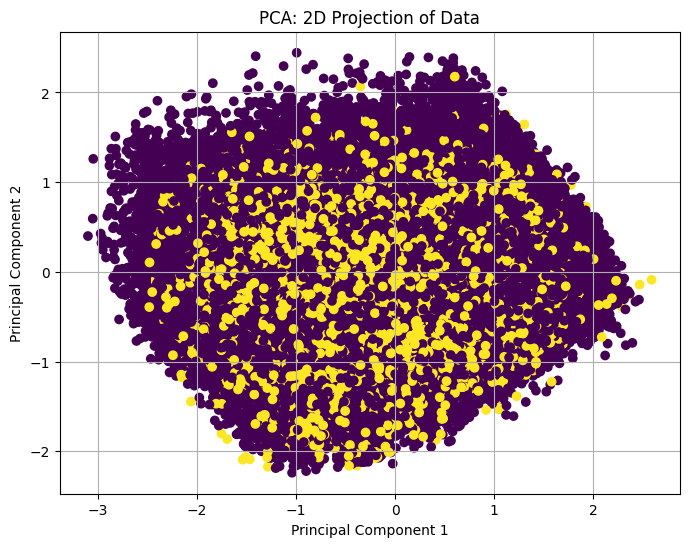

In [11]:
from sklearn.decomposition import PCA
# Fit PCA model
pca = PCA(n_components=2)  # Number of components to extract
pca.fit(df.select_dtypes("number"))

# Get the components (loadings) of each principal component
df_comp = pd.DataFrame()

df_comp["loading"] = pca.components_[0]
df_comp["column"] = df.select_dtypes('number').columns
print(df_comp.sort_values('loading'))

# Fit PCA model
pca = PCA(n_components=2)  # We reduce the data to 2 components
X_pca = pca.fit_transform(df.select_dtypes("number"))  # Transform the original data
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['p_interface'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Data')
plt.grid(True)
plt.show()

## TSNE

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
data_subset = df.drop(columns=["p_interface"]).select_dtypes('number')
tsne_results = tsne.fit_transform(data_subset)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
#df_subset['tsne-2d-three'] = tsne_results[:,2]

C:\Users\maxvV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 65149 samples in 0.037s...
[t-SNE] Computed neighbors for 65149 samples in 7.991s...
[t-SNE] Computed conditional probabilities for sample 1000 / 65149
[t-SNE] Computed conditional probabilities for sample 2000 / 65149
[t-SNE] Computed conditional probabilities for sample 3000 / 65149
[t-SNE] Computed conditional probabilities for sample 4000 / 65149
[t-SNE] Computed conditional probabilities for sample 5000 / 65149
[t-SNE] Computed conditional probabilities for sample 6000 / 65149
[t-SNE] Computed conditional probabilities for sample 7000 / 65149
[t-SNE] Computed conditional probabilities for sample 8000 / 65149
[t-SNE] Computed conditional probabilities for sample 9000 / 65149
[t-SNE] Computed conditional probabilities for sample 10000 / 65149
[t-SNE] Computed conditional probabilities for sample 11000 / 65149
[t-SNE] Computed conditional probabilities for sample 12000 / 65149
[t-SNE] Computed conditional probabilities for sa

In [13]:
# Import dependencies for 3d plotting
import plotly
import plotly.graph_objs as go

def plot3d_ab(x,y,z,colorlist):
    
    trace = go.Scatter3d(x=x,y=y,z=z,mode='markers',
                         marker={'size': 5,"color":colorlist},line={'width':3},name="ptm structure")
    
    # Configure the layout.
    layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
    data = [trace]
    plot_figure = go.Figure(data=data, layout=layout)
    # Render the plot.
    
    plot_figure.update_layout(autosize=True) # remove height=800
    plot_figure.show(renderer="browser")  # remove display(fig)
    plot_figure.write_html("plot.html")
    # Adding vertical lines at z = 0
    
    plotly.offline.iplot(plot_figure)

C:\Users\maxvV\AppData\Local\Temp\ipykernel_9532\873821193.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

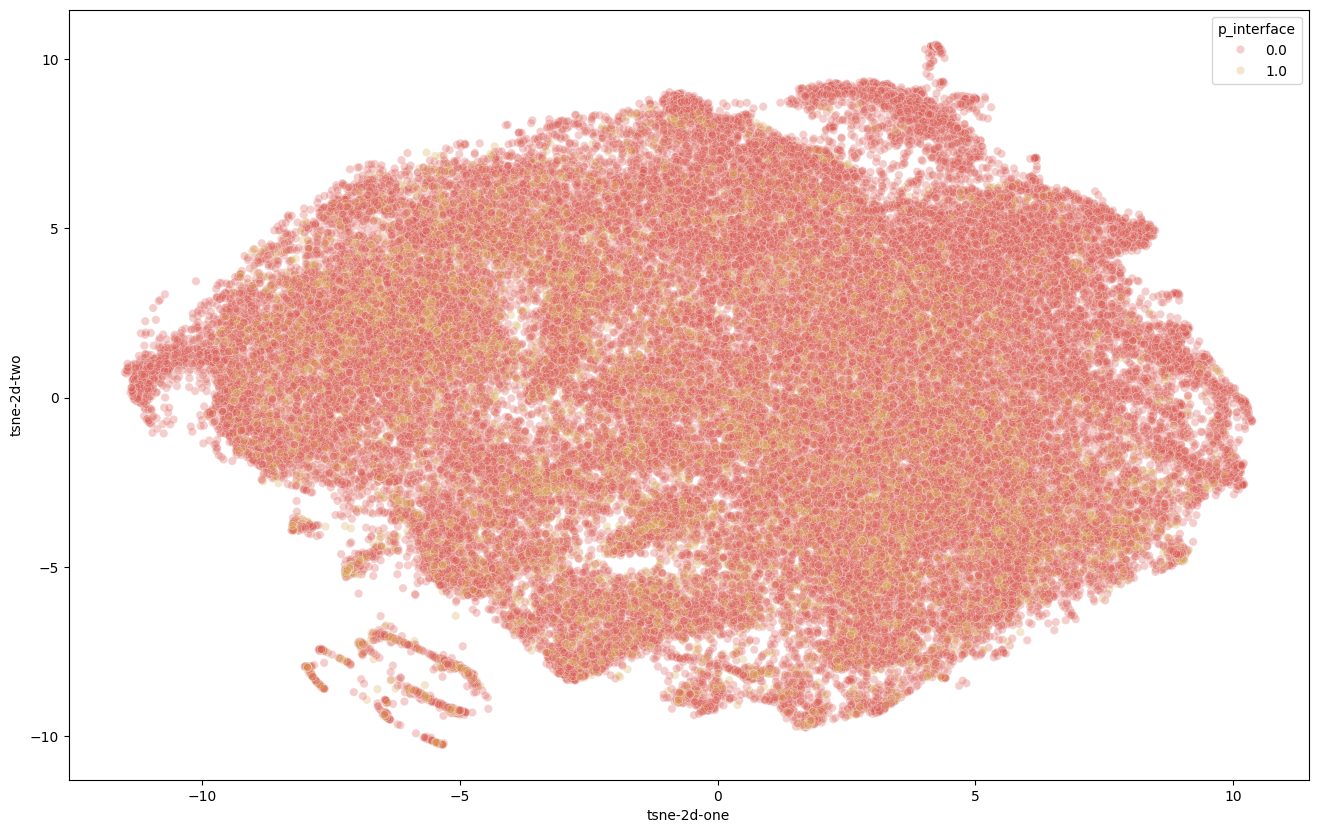

In [25]:
##data_subset["sheet"]= data_subset["prob_sheet"]>data_subset["prob_helix"]
struclist = [
    1 if data_subset["prob_sheet"].iloc[i] == max(data_subset["prob_sheet"].iloc[i], data_subset["prob_helix"].iloc[i], data_subset["prob_coil"].iloc[i])
    else 2 if data_subset["prob_helix"].iloc[i] == max(data_subset["prob_sheet"].iloc[i], data_subset["prob_helix"].iloc[i], data_subset["prob_coil"].iloc[i])
    else 3
    for i in range(len(data_subset))
]


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df["p_interface"],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

##plot3d_ab( x=df_subset["tsne-2d-one"], y=df_subset["tsne-2d-two"],z=df_subset["tsne-2d-three"],colorlist=struclist)

In [15]:
print(struclist.count(3),"Coil max")
print(struclist.count(2),"Helix max")
print(struclist.count(1),"Sheet max")

59723 Coil max
4958 Helix max
468 Sheet max


## Inspecting class imbalance Under/oversampling 

In [16]:
print("predicted interfaces\t\t",list(df.p_interface).count(1))
print("predicted not interfaces\t",list(df.p_interface).count(0))
print(list(df.p_interface).count(1)/len(df))

predicted interfaces		 7845
predicted not interfaces	 57304
0.12041627653532672


In [17]:
new_x = df[df["p_interface"]==0].sample(7845)
new_y = df[df["p_interface"]==1]
b_df = pd.concat([new_x,new_y])
print("predicted interfaces\t\t",list(b_df.p_interface).count(1))
print("predicted not interfaces\t",list(b_df.p_interface).count(0))

predicted interfaces		 7845
predicted not interfaces	 7845


# Train Test splitting

In [18]:

test_size = 50
normalise = False

testproteins = random.sample(list(df["uniprot_id"].unique()),test_size)
trainproteins = set(df["uniprot_id"].unique()) - set(testproteins) 

# scramble the rows
df_train = df[df["uniprot_id"].isin(trainproteins)].sample(frac=1) # which protein_id's to use and sample to scramble rows
df_test = df[df["uniprot_id"].isin(testproteins)].sample(frac=1)


# setting training/testing dataframes and making numerical
x_train = df_train[df_train.columns[:-1]].select_dtypes("number")
x_test = df_test[df_test.columns[:-1]].select_dtypes("number")
y_train = df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]
# normalise 
if normalise:
    for i in [x_train,x_test,y_train,y_test]:
        i=(i-i.mean())/i.std()



In [19]:
#from imblearn.over_sampling import SMOTE
# After dividing the data in train and test, we can try to handle the class imbalance in the training set

# Concatenate the two groups
#X = df_train.select_dtypes("number").drop(columns=["p_interface"])  # Drop the target variable
#y = df_train["p_interface"]  # Target variable (p_interface)
# Initialize SMOTE with the desired parameters
#smote = SMOTE(sampling_strategy='auto', random_state=1)
#x_train, y_train = smote.fit_resample(X, y)


# Fitting and running models

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
print("Accuracy of Random Forest:", accuracy_score(y_test, rf_predictions))
print("f1:", f1_score(y_test, rf_predictions))
print(confusion_matrix(y_test,rf_predictions))



Accuracy of Random Forest: 0.8795988934993084
f1: 0.0011474469305794606
[[12718     0]
 [ 1741     1]]


In [21]:
sns.heatmap(confusion_matrix(y_test,rf_predictions),annot=True,cmap="viridis")
plt.suptitle(f"Random Forest,{}")
plt.title(f"Acc:{round(accuracy_score(y_test, rf_predictions),3)}, F1:{round(f1_score(y_test, rf_predictions),4)}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

SyntaxError: f-string: empty expression not allowed (113678502.py, line 2)

In [ ]:
feature_ranking = pd.DataFrame({"feature":x_train.columns,"importance":rf.feature_importances_})
feature_ranking.sort_values("importance",ascending=False)

array([0.00443623, 0.06846943, 0.00578817, 0.00827914, 0.0049657 ,
       0.02193945, 0.01544035, 0.01129435, 0.02237509, 0.00933253,
       0.00863882, 0.00814855, 0.01672525, 0.01019305, 0.00872032,
       0.01154035, 0.0122637 , 0.00776195, 0.0083809 , 0.00850035,
       0.00917992, 0.00899035, 0.01102665, 0.0132463 , 0.01144782,
       0.02059216, 0.01203794, 0.0102883 , 0.00480539, 0.00478076,
       0.00481774, 0.0050659 , 0.00506439, 0.00496967, 0.00526328,
       0.0060431 , 0.00474132, 0.00453068, 0.00467424, 0.0046927 ,
       0.00998024, 0.00604799, 0.00577665, 0.00506636, 0.00664034,
       0.0056627 , 0.00510227, 0.00528019, 0.00509758, 0.00465713,
       0.00479537, 0.00498906, 0.00595071, 0.00525616, 0.00614192,
       0.00533796, 0.00741559, 0.00654373, 0.00518565, 0.00607018,
       0.00479693, 0.00502983, 0.00518362, 0.00533269, 0.00509353,
       0.00526335, 0.00786079, 0.00598158, 0.00553611, 0.00571975,
       0.00523455, 0.00533331, 0.00550948, 0.00541483, 0.00535

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(15) # We set the number of neighbors to 15
knn.fit(x_train, y_train)

y_predicted = knn.predict(x_test)
print('accuracy ', accuracy_score(y_test, y_predicted))


accuracy  0.3261214767764986


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,20), random_state=1)

clf.fit(x_train, y_train)

y_predicted = clf.predict(x_test)
print('accuracy ', accuracy_score(y_test, y_predicted))

accuracy  0.6146619028715099


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


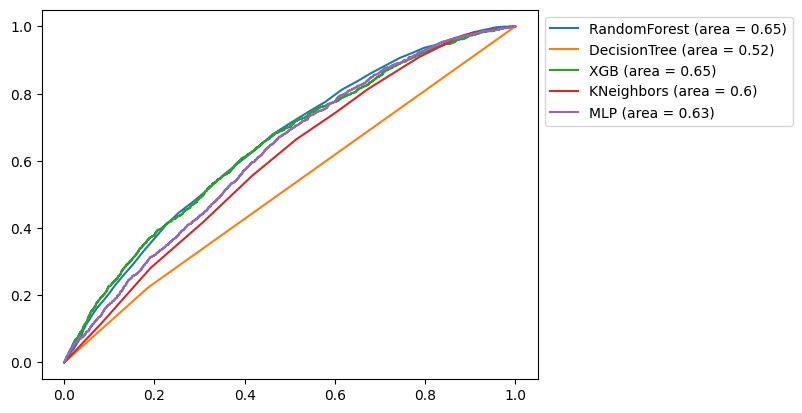

In [ ]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics. import confusion_matrix
for model in [rf,tree,xgboost,knn,clf]:
    y_pred  = model.predict_proba(x_test)
    curve  = roc_curve(y_test, y_pred[:, 1])
    auc_  = auc(curve[0], curve[1])
    name = model.__str__().split('Class')[0]
    plt.plot(curve[0], curve[1], label=f'{name} (area = {round(auc_,2)})')
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
feature_ranking = pd.DataFrame({"feature":x_train.columns,"importance":rf.feature_importances_})
feature_ranking.sort_values("importance",ascending=False)

,feature,importance
1,normalized_length,0.060015
5,prob_sheet,0.026397
8,pssm_A,0.021733
6,prob_helix,0.018366
12,pssm_C,0.017227
...,...,...
39,9_wm_rel_surf_acc,0.004708
36,3_wm_rel_surf_acc,0.004685
28,3_wm_normalized_abs_surf_acc,0.004628
38,7_wm_rel_surf_acc,0.004555


In [ ]:
def ppi_prepoc(file,classbalancing=None,test_size = 50,extra_feature=True,testproteins= random.sample(list(df["uniprot_id"].unique()),test_size)):
    # Removing unnamed Aminoacid
    df = pd.read_csv("ppi.csv") # reading in df
    df = df[df["sequence"]!= 'X'] # Removing the spooky amino-acid x
    df = df[df.columns[1:]]     # removing unnamed column
    if extra_feature:
        df["aa_RelatPosition"] = df["aa_ProtPosition"] / df["Rlength"]
        df = df[[c for c in df if c not in ["domain","aa_ProtPosition","Rlength",'p_interface']] + ['p_interface']]
    else:
        df = df[[c for c in df if c not in ["domain","aa_ProtPosition","Rlength",'p_interface']] + ['p_interface']]
    # selecting Train and Test

    trainproteins = set(df["uniprot_id"].unique()) - set(testproteins) 
    
    df_train = df[df["uniprot_id"].isin(trainproteins)].sample(frac=1) # which protein_id's to use and sample to scramble rows
    df_test = df[df["uniprot_id"].isin(testproteins)].sample(frac=1)

    # Applying different sampling methods on the training data 

    if classbalancing == "under_sampling":
        # Undersampling the training set
        df_train = df[df["uniprot_id"].isin(trainproteins)].sample(frac=1) # which protein_id's to use and sample to scramble rows
        # count the number of P_interface=1 amd sample as many p_interface=0 as that 
        new_x = df_train[df_train["p_interface"]==0].sample(list(df_train["p_interface"]).count(1))
        new_y = df_train[df_train["p_interface"]==1]
        # make this a single dataframe
        df_train = pd.concat([new_x,new_y])
        # splitting this into x and y (i could shorten this but this is gives more oversight)
        x_train = df_train[df_train.columns[:-1]].select_dtypes("number")
        y_train = df_train[df_train.columns[-1]]
    elif classbalancing == "over_sampling":
        # Concatenate the two groups
        X = df_train.select_dtypes("number").drop(columns=["p_interface"])  # Drop the target variable
        y = df_train["p_interface"]  # Target variable (p_interface)
        # Initialize SMOTE with the desired parameters
        smote = SMOTE(sampling_strategy='auto', random_state=1)
        x_train, y_train = smote.fit_resample(X, y)
    else:
        x_train = df_train[df_train.columns[:-1]].select_dtypes("number")
        y_train = df_train[df_train.columns[-1]]
            
    # making test data

    x_test = df_test[df_test.columns[:-1]].select_dtypes("number")
    y_test = df_test[df_test.columns[-1]]

    # Fitting the models
    rf = RandomForestClassifier(class_weight='balanced')
    rf.fit(x_train, y_train)

    xgboost = XGBClassifier()
    xgboost.fit(x_train, y_train)
  
    # Displaying the results

    for model in [rf,xgboost]:
        #y_pred  = model.predict_proba(x_test)
        #curve  = roc_curve(y_test, y_pred[:, 1])
        #auc_  = auc(curve[0], curve[1])
        name = model.__str__().split('Class')[0]
        #plt.plot(curve[0], curve[1], label=f'{name} (area = {round(auc_,2)})')
        y_pred = model.predict(x_test)
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis")
        plt.suptitle(f"{name},Balancing:{classbalancing}",fontweight='bold')
        plt.title(f"Acc:{round(accuracy_score(y_test,y_pred),3)}, F1:{round(f1_score(y_test, y_pred),4)} extraF:{extra_feature}")
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.show()



    #plt.legend(bbox_to_anchor=(1,1))
    #plt.title(f'balancing:{classbalancing} test:{test_size}:proteins, feature extra{extra_feature}')
    #plt.show()
    
    feature_ranking = pd.DataFrame({"feature":x_train.columns,"importance":rf.feature_importances_})
    return feature_ranking.sort_values("importance",ascending=False,ignore_index=True)

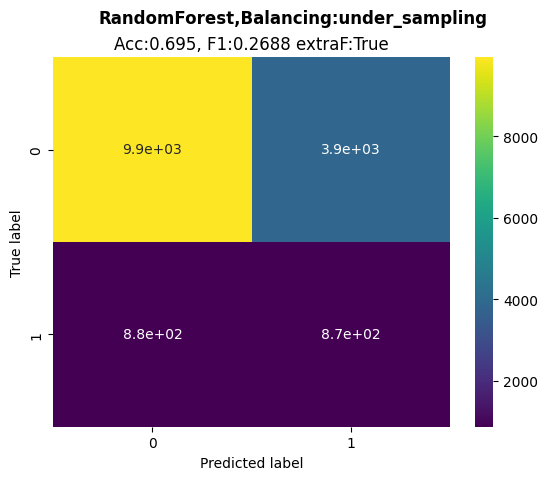

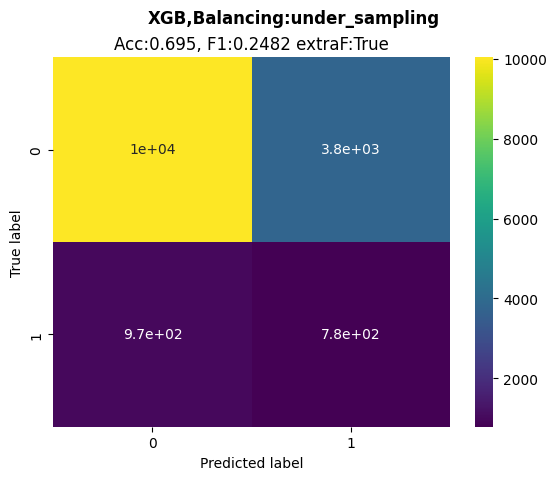

,feature,importance
0,normalized_length,0.066247
1,9_wm_pssm_S,0.017947
2,aa_RelatPosition,0.012817
3,9_wm_pssm_P,0.012138
4,5_wm_pssm_S,0.010757
5,7_wm_pssm_S,0.010745
6,9_wm_pssm_E,0.010624
7,9_wm_pssm_Q,0.010624
8,5_wm_pssm_P,0.009752
9,9_wm_pssm_R,0.009692


In [ ]:
rankings = ppi_prepoc("ppi.csv",'under_sampling',50,True)
rankings.head(20)

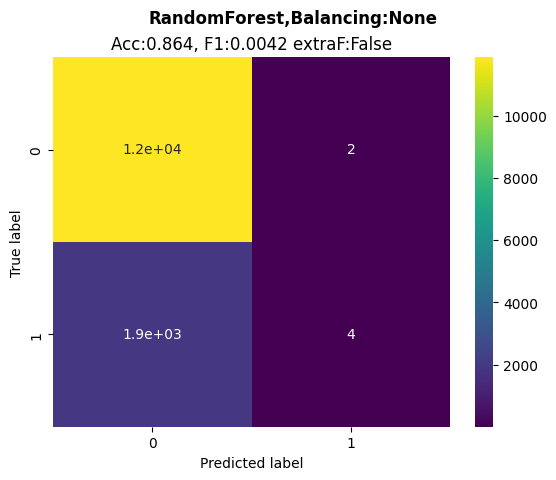

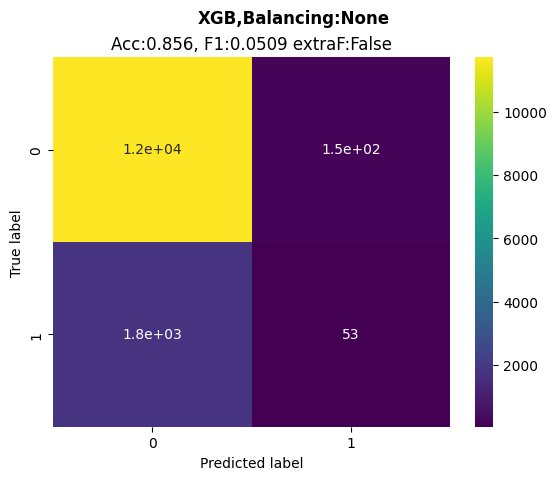

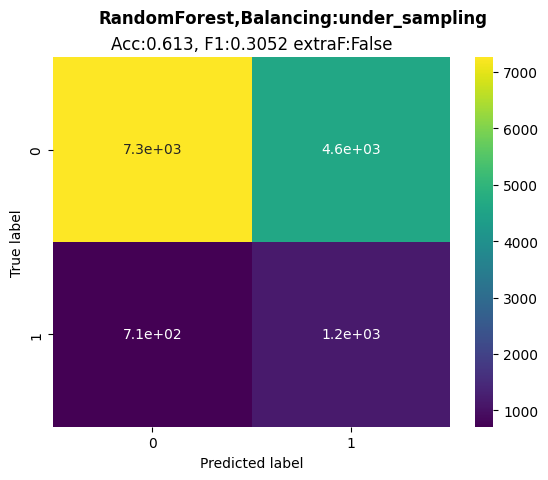

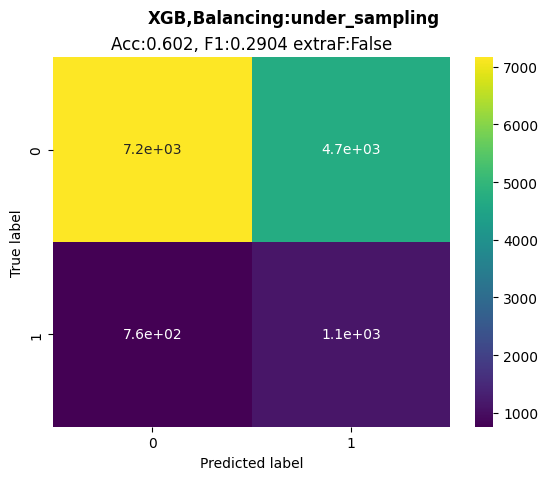

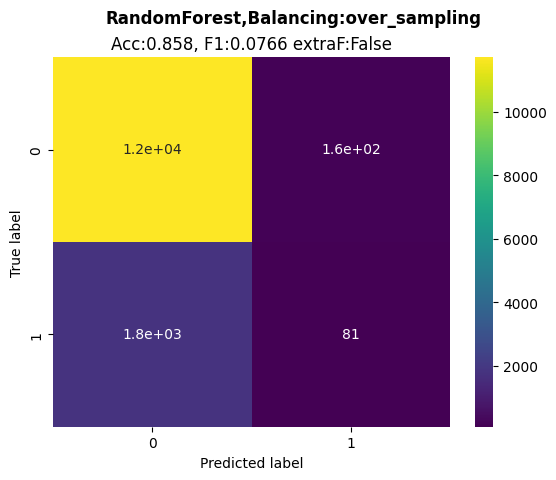

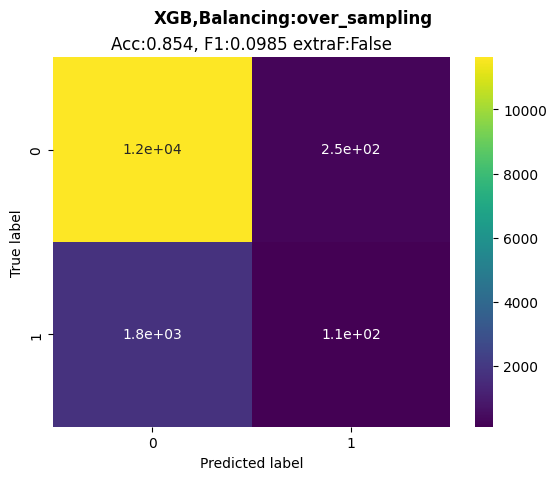

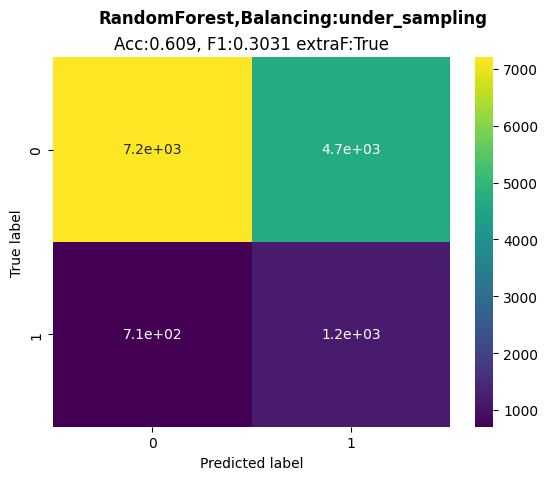

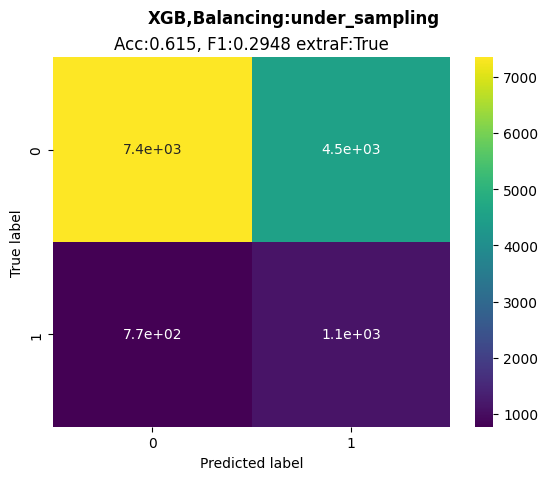

,feature,importance
0,normalized_length,0.068683
1,9_wm_pssm_S,0.014503
2,aa_RelatPosition,0.013094
3,7_wm_pssm_S,0.012802
4,7_wm_pssm_P,0.011279
...,...,...
127,pssm_T,0.003966
128,pssm_W,0.003792
129,pssm_F,0.003778
130,pssm_A,0.003596


In [ ]:
testproteins = random.sample(list(df["uniprot_id"].unique()),test_size)
ppi_prepoc("ppi.csv",None,50,False,testproteins)
ppi_prepoc("ppi.csv",'under_sampling',50,False,testproteins)
ppi_prepoc("ppi.csv",'over_sampling',50,False,testproteins)
ppi_prepoc("ppi.csv",'under_sampling',50,True,testproteins)

# py version

In [ ]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

def ppi_prepoc(df,testproteins,classbalancing=None,test_size = 50,extra_feature=True):
    if extra_feature:
        df["aa_RelatPosition"] = df["aa_ProtPosition"] / df["Rlength"]
        df = df[[c for c in df if c not in ["domain","aa_ProtPosition","Rlength",'p_interface']] + ['p_interface']]
    else:
        df = df[[c for c in df if c not in ["domain","aa_ProtPosition","Rlength",'p_interface']] + ['p_interface']]

    # selecting Train and Test
    if testproteins == None:
        testproteins = random.sample(list(df["uniprot_id"].unique()),test_size)
    
    trainproteins = set(df["uniprot_id"].unique()) - set(testproteins) 
    
    df_train = df[df["uniprot_id"].isin(trainproteins)].sample(frac=1) # which protein_id's to use and sample to scramble rows
    df_test = df[df["uniprot_id"].isin(testproteins)].sample(frac=1)

    # Applying different sampling methods on the training data 

    if classbalancing == "under_sampling":
        # Undersampling the training set
        df_train = df[df["uniprot_id"].isin(trainproteins)].sample(frac=1) # which protein_id's to use and sample to scramble rows
        # count the number of P_interface=1 amd sample as many p_interface=0 as that 
        new_x = df_train[df_train["p_interface"]==0].sample(list(df_train["p_interface"]).count(1))
        new_y = df_train[df_train["p_interface"]==1]
        # make this a single dataframe
        df_train = pd.concat([new_x,new_y])
        # splitting this into x and y (i could shorten this but this is gives more oversight)
        x_train = df_train[df_train.columns[:-1]].select_dtypes("number")
        y_train = df_train[df_train.columns[-1]]
    elif classbalancing == "over_sampling":
        # Concatenate the two groups
        X = df_train.select_dtypes("number").drop(columns=["p_interface"])  # Drop the target variable
        y = df_train["p_interface"]  # Target variable (p_interface)
        # Initialize SMOTE with the desired parameters
        smote = SMOTE(sampling_strategy='auto', random_state=1)
        x_train, y_train = smote.fit_resample(X, y)
    else:
        x_train = df_train[df_train.columns[:-1]].select_dtypes("number")
        y_train = df_train[df_train.columns[-1]]
            
    # making test data

    x_test = df_test[df_test.columns[:-1]].select_dtypes("number")
    y_test = df_test[df_test.columns[-1]]

    # Fitting the models
    rf = RandomForestClassifier(class_weight='balanced')
    rf.fit(x_train, y_train)

    xgboost = XGBClassifier()
    xgboost.fit(x_train, y_train)
  
    # Displaying the results

    for model in [rf,xgboost]:
        #y_pred  = model.predict_proba(x_test)
        #curve  = roc_curve(y_test, y_pred[:, 1])
        #auc_  = auc(curve[0], curve[1])
        name = model.__str__().split('Class')[0]
        #plt.plot(curve[0], curve[1], label=f'{name} (area = {round(auc_,2)})')
        y_pred = model.predict(x_test)
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis")
        plt.suptitle(f"{name},Balancing:{classbalancing}",fontweight='bold')
        plt.title(f"Acc:{round(accuracy_score(y_test,y_pred),3)}, F1:{round(f1_score(y_test, y_pred),4)} extraF:{extra_feature}")
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.show()



    #plt.legend(bbox_to_anchor=(1,1))
    #plt.title(f'balancing:{classbalancing} test:{test_size}:proteins, feature extra{extra_feature}')
    #plt.show()
    
    feature_ranking = pd.DataFrame({"feature":x_train.columns,"importance":rf.feature_importances_})
    return feature_ranking.sort_values("importance",ascending=False,ignore_index=True)

def main():
    # read ppi as df
    # Removing unnamed Aminoacid
    df = pd.read_csv("ppi.csv") # reading in df
    df = df[df["sequence"]!= 'X'] # Removing the spooky amino-acid x
    df = df[df.columns[1:]]     # removing unnamed column

    # setting amount of testable proteins
    test_size = 50
    # running one instance of proteins to keep data comparable
    testproteins = random.sample(list(df["uniprot_id"].unique()),test_size)

    ppi_prepoc(df,testproteins,None,50,False)
    ppi_prepoc(df,testproteins,'under_sampling',False)
    ppi_prepoc(df,testproteins,'over_sampling',False)
    ppi_prepoc(df,testproteins,'under_sampling',True)

if __name__ == "__main__":
    main()
    

KeyboardInterrupt: 